In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from mlxtend.plotting import plot_decision_regions

In [18]:
df = pd.read_csv("../datasets/ushape.csv")

In [19]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [20]:
df.columns = ['x', 'y', 'class']

In [21]:
df.head()

,x,y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


<Axes: xlabel='x', ylabel='y'>

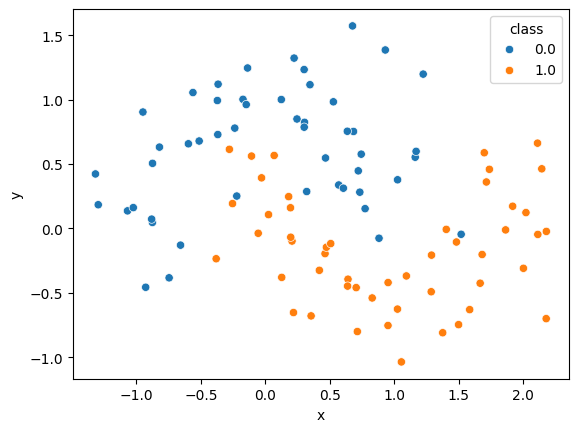

In [24]:
sns.scatterplot(x=df['x'], y=df['y'], hue=df['class'])

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x

In [29]:
model = Sequential()

model.add(Dense(10, activation='tanh', input_dim = 2))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

c:\Users\Subham Pathak\Desktop\AI\DEEP_LEARNING\myenv39\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
inital_weights = model.get_weights()

12


In [38]:
inital_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
inital_weights[1] = np.zeros(model.get_weights()[1].shape)
inital_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
inital_weights[3] = np.zeros(model.get_weights()[3].shape)
inital_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
inital_weights[5] = np.zeros(model.get_weights()[5].shape)
inital_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
inital_weights[7] = np.zeros(model.get_weights()[7].shape)
inital_weights[8] = np.random.randn(10,10)*np.sqrt(1/10)
inital_weights[9] = np.zeros(model.get_weights()[9].shape)


In [39]:
model.set_weights(inital_weights)


In [ ]:
model.get_weights()

In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x, y, epochs = 100, validation_split=0.2)

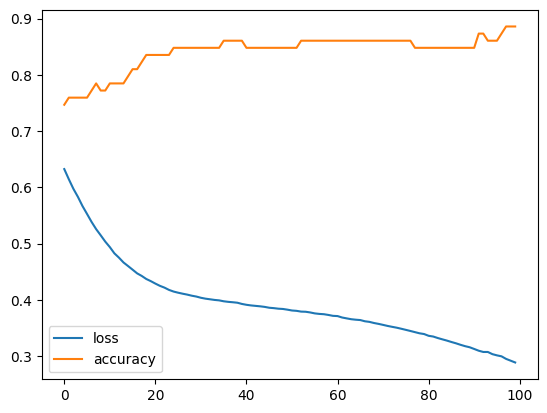

In [44]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label='loss')
ax.plot(history.history['accuracy'], label = 'accuracy')
plt.legend()

In [50]:
x = x.values
y = y.values

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 700us/step


<Axes: >

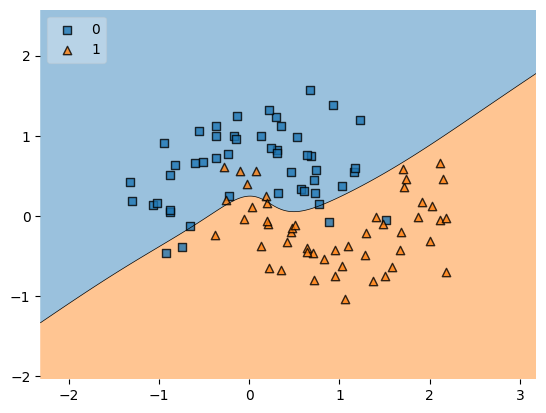

In [51]:
plot_decision_regions(x, y.astype('int'), clf = model, legend=2)